# Doğrusal Olmayan Regresyon Modelleri ile Oyuncu Maaş Tahmini

In [8]:
!pip install catboost

In [10]:
!pip install lightgbm

In [12]:
!pip install xgboost

In [30]:
#Gerekli Kütüphaneler import edilir
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor

In [31]:
#veri seti df dataframe atanır ve kategorik degiskenler OneHot encoding metoduyla sayısal ifadelere çevirilir
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])

In [32]:
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


## Bütün modelleri eğitip test hatalarını karşılaştırmak için fonksiyon kullanılır

In [33]:

def compML(df, y, alg): 
    #train-test ayrımı
    y = df[y]
    X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #dummy degiskenler tablodan silinir
    X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
   
    #modelleme   
    model=alg().fit(X_train, y_train)
    y_pred =model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi=alg.__name__
    print(model_ismi,"Modeli Test Hatası",RMSE)

In [34]:
compML(df,"Salary",SVR)

SVR Modeli Test Hatası 460.0032657244849


In [35]:
models= [LGBMRegressor,
        XGBRegressor,
        GradientBoostingRegressor,
        RandomForestRegressor,
        DecisionTreeRegressor,
        MLPRegressor,
        KNeighborsRegressor,
        SVR]

In [36]:
#bütün modeller eğitilip test hataları çıkartılır
for i in models:
    compML(df,"Salary",i)

LGBMRegressor Modeli Test Hatası 363.8712087611089
XGBRegressor Modeli Test Hatası 355.46515176059927
GradientBoostingRegressor Modeli Test Hatası 352.0735850882427
RandomForestRegressor Modeli Test Hatası 343.98063914530167
DecisionTreeRegressor Modeli Test Hatası 477.590546930727
MLPRegressor Modeli Test Hatası 359.0120833628988
KNeighborsRegressor Modeli Test Hatası 426.6570764525201
SVR Modeli Test Hatası 460.0032657244849


C:\Users\osman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


verilen veri seti için en uygun model Random Forest Regressor modelidir.

model tahmini ve gerçek değer görselleştirilir

In [39]:
#train-test ayrımı
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #dummy degiskenler tablodan silinir
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [40]:
model_random_for=RandomForestRegressor().fit(X_train, y_train)
y_pred =model_random_for.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
R2 = r2_score(y_test,y_pred)

In [43]:
type(y_pred)

numpy.ndarray

In [44]:
type(y_test)

pandas.core.series.Series

In [45]:
y_pred

array([ 799.47833,  872.87403, 1166.42571,  137.195  ,  621.08333,
        338.89502,  199.39501,  115.61   ,  822.22499,  565.74167,
        800.185  ,  909.44472,  556.31667,  182.72   ,  365.48333,
       1006.51665,  900.87001,   99.31   ,  830.39   ,  270.96667,
        414.77501,  901.06166,  662.825  ,  651.09169,  432.625  ,
         78.565  ,  945.98668,  365.81   ,  655.25832,   94.26667,
         85.915  ,  530.385  ,  498.25004,  223.12667,  248.8717 ,
        817.42498, 1314.15882,  215.44   ,   93.44   ,  515.58335,
         82.895  ,  128.1    ,  637.06164,  702.71165, 1270.91714,
        907.01733,  493.33335,  104.385  ,  174.56   ,  704.045  ,
        876.05568,  634.36666,  733.72403,  183.485  ,   97.035  ,
        797.53333,  641.86832,  686.24998,  210.1217 , 1318.57547,
       1199.6905 ,  566.555  ,  716.25   ,  486.31667,  590.21667,
         79.01   ])

In [46]:
y_test = np.array(y_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

In [47]:
y_pred

,0
0,799.47833
1,872.87403
2,1166.42571
3,137.19500
4,621.08333
...,...
61,566.55500
62,716.25000
63,486.31667
64,590.21667


In [48]:
karar_tablosu = pd.concat([y_test,y_pred],axis=1)
karar_tablosu.columns=["gercek_y","tahmin_edilen_y"]
karar_tablosu.head(10)

,gercek_y,tahmin_edilen_y
0,850.000,799.47833
1,277.500,872.87403
2,875.000,1166.42571
3,150.000,137.19500
4,260.000,621.08333
5,277.500,338.89502
6,210.000,199.39501
7,140.000,115.61000
8,517.143,822.22499
9,325.000,565.74167


In [49]:
R2
#r kare skoru -- verimiz %45 degerinde modelimiz tarafından açıklanabilmiş

0.4556198262583142

In [50]:
RMSE
#ortalama hata kareler karekökü skoru

343.28582538566707

## MODEL TUNİNG

In [51]:
rf_params = {"max_depth":[5,8,10],
            "max_features":[2,5,10],
            "n_estimators":[200, 500, 1000,2000],
            "min_samples_split":[2,10,80,100]}

In [52]:
rf_cv_model = GridSearchCV(model_random_for, rf_params, cv=10,n_jobs=-1, verbose= 2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [53]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [55]:
rf_tuned = RandomForestRegressor(random_state=42,
                                max_depth=5,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned = model_random_for.fit(X_train,y_train)

In [64]:
y_pred = rf_tuned.predict(X_test)

In [65]:
y_test = np.array(y_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

In [66]:
karar_tablosu = pd.concat([y_test,y_pred],axis=1)
karar_tablosu.columns=["gercek_y","tahmin_edilen_y"]
karar_tablosu.head(10)

,gercek_y,tahmin_edilen_y
0,850.000,738.09166
1,277.500,868.63330
2,875.000,1110.58904
3,150.000,134.31500
4,260.000,575.48333
5,277.500,349.51833
6,210.000,193.94168
7,140.000,113.64000
8,517.143,833.02833
9,325.000,508.71666


In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

340.6184802906836

In [68]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

340.6184802906836

In [69]:
R2 = r2_score(y_test,y_pred)
R2

0.4640466731349222

## Değişkenlerin Önem Düzeyi

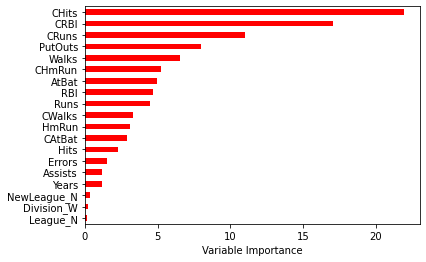

In [70]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by= 'Importance',
                      axis = 0,
                      ascending = True).plot(kind= 'barh',
                                             color = 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_=None


Atış Sayısı oyuncuya verilen maaş degerini diğer tüm veri değerlerinden daha çok etkiler.